# 911 Calls Capstone Project

### This following part of this exercise can be done and delivered      untill Saturday, 22/06/2024 up to 12:10PM (middle of day).

For this capstone project we will be analyzing some 911 call data. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [438]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [439]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [440]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [442]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [443]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [444]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [445]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [446]:
df['Reason'] = df['title'].apply(lambda l: l.split(':')[0])
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [447]:
df['Reason'].value_counts().head(1)

Reason
EMS    48877
Name: count, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<function matplotlib.pyplot.show(close=None, block=None)>

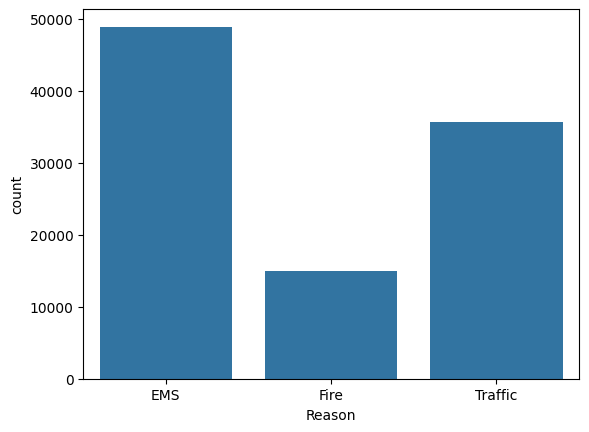

In [448]:
sns.countplot(x='Reason', data=df)
plt.show

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [449]:
dataType = df['timeStamp'].dtype 
print("dtype:", dataType) # Using " df['timeStamp'].dtype " without " print() ", the output will be only " dtype('O') "

dtype: object


** You should have seen that these timestamps are still strings. You must convert the column from strings to DateTime objects. **

In [450]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].iloc[0].hour # exemple below

17

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [451]:
df['Hour'] = df['timeStamp'].apply(lambda l: l.hour)
df['Month'] = df['timeStamp'].apply(lambda l: l.month)
df['Day of Week'] = df['timeStamp'].apply(lambda l: l.dayofweek)
df['Day of Week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [452]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [453]:
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

<function matplotlib.pyplot.show(close=None, block=None)>

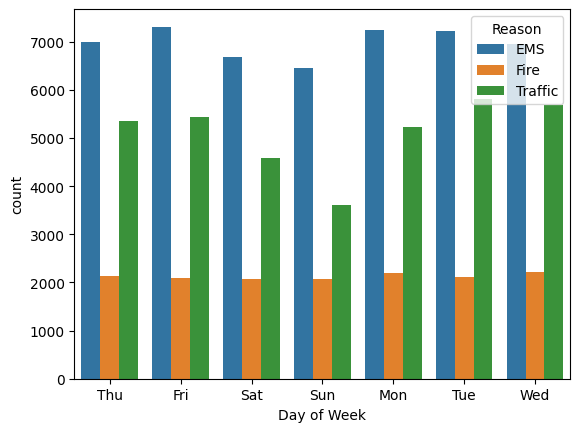

In [454]:
sns.countplot(x='Day of Week', data=df, hue='Reason')
plt.show

**Now do the same for Month:**

<function matplotlib.pyplot.show(close=None, block=None)>

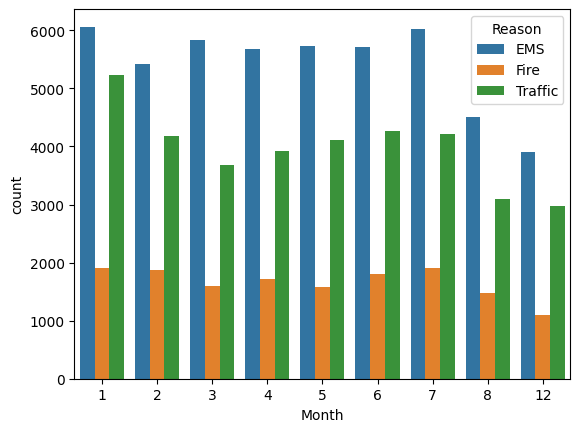

In [455]:
sns.countplot(x='Month', data=df, hue='Reason')
plt.show

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [456]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<function matplotlib.pyplot.show(close=None, block=None)>

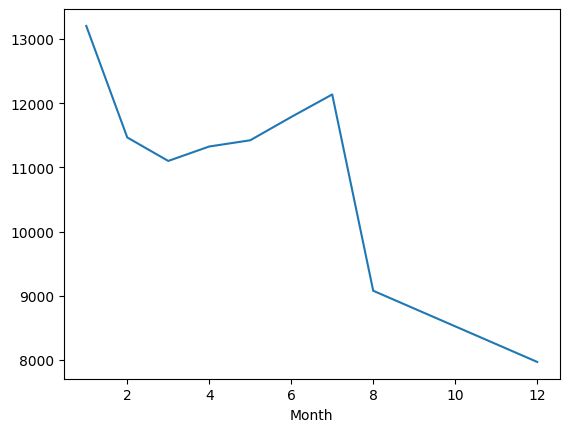

In [457]:
byMonth['title'].plot()
plt.show

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

<function matplotlib.pyplot.show(close=None, block=None)>

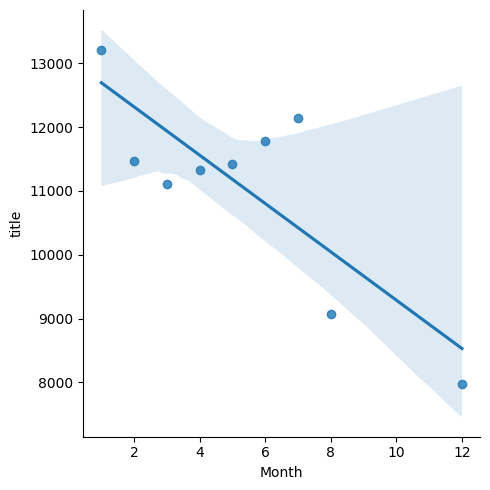

In [458]:
sns.lmplot(x='Month', y='title', data=byMonth.reset_index())
plt.show

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [459]:
df['Date'] = df['timeStamp'].apply(lambda l: l.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

<function matplotlib.pyplot.show(close=None, block=None)>

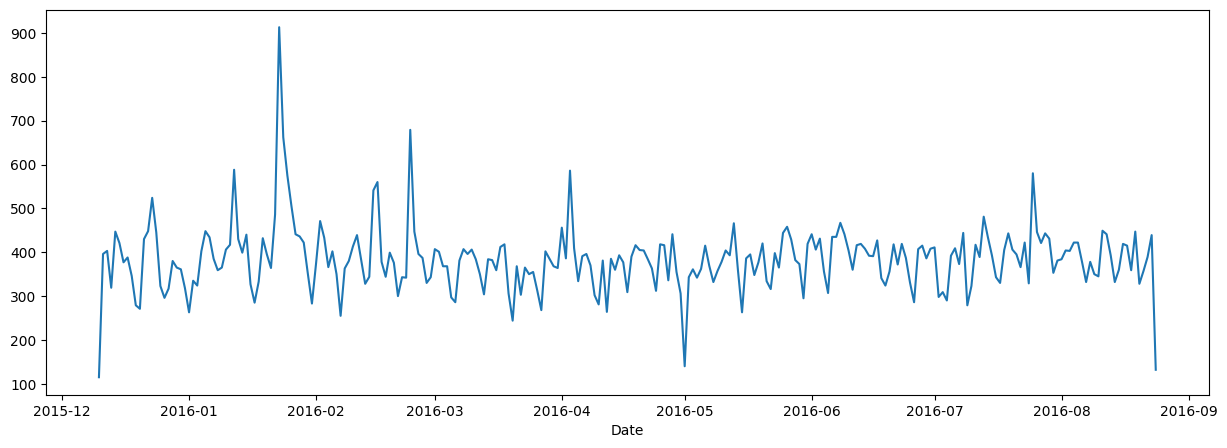

In [460]:
plt.figure(figsize=(15, 5))
df.groupby('Date').count()['title'].plot()
plt.show

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

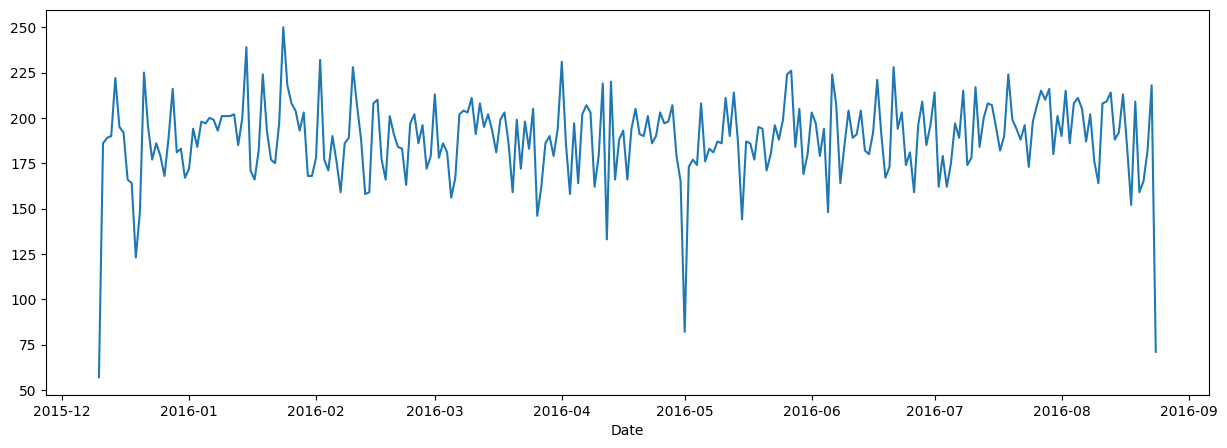

In [461]:
plt.figure(figsize=(15, 5))
df[df['Reason'] == 'EMS'].groupby('Date').count()['title'].plot()
plt.show()

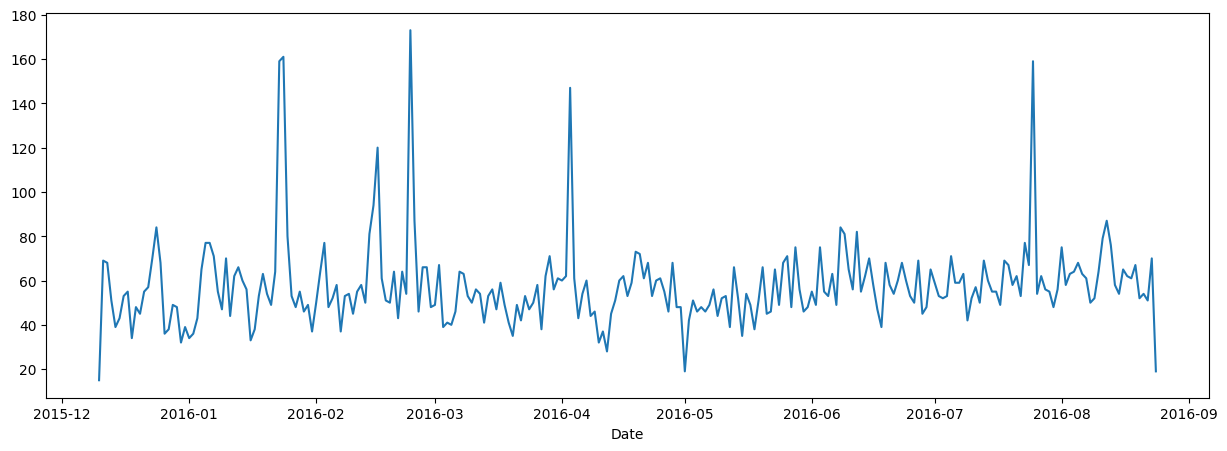

In [462]:
plt.figure(figsize=(15, 5))
df[df['Reason'] == 'Fire'].groupby('Date').count()['title'].plot()
plt.show()

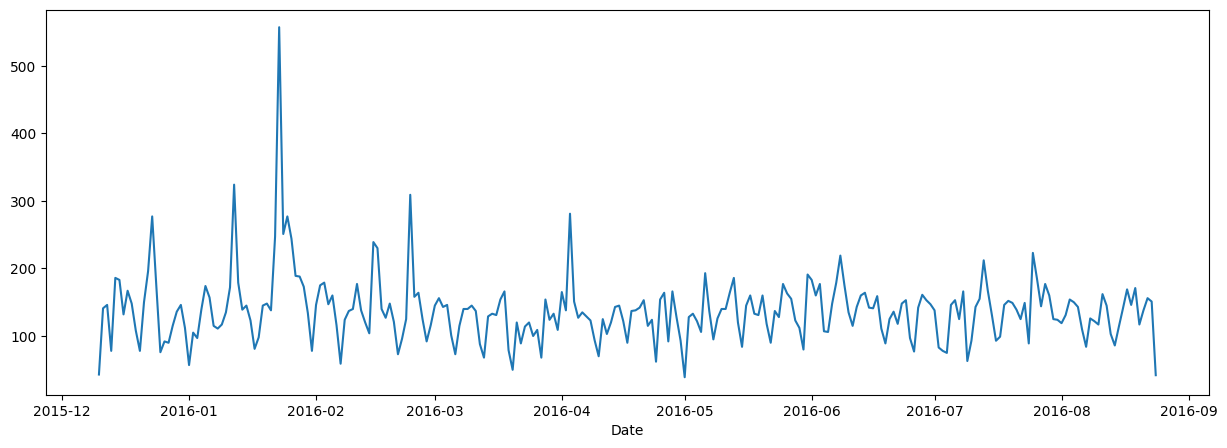

In [463]:
plt.figure(figsize=(15, 5))
df[df['Reason'] == 'Traffic'].groupby('Date').count()['title'].plot()
plt.show()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [464]:
dayHourdf = df.groupby(by=['Day of Week', 'Hour']).count()['title'].unstack()
dayHourdf

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Now create a HeatMap using this new DataFrame. **

<function matplotlib.pyplot.show(close=None, block=None)>

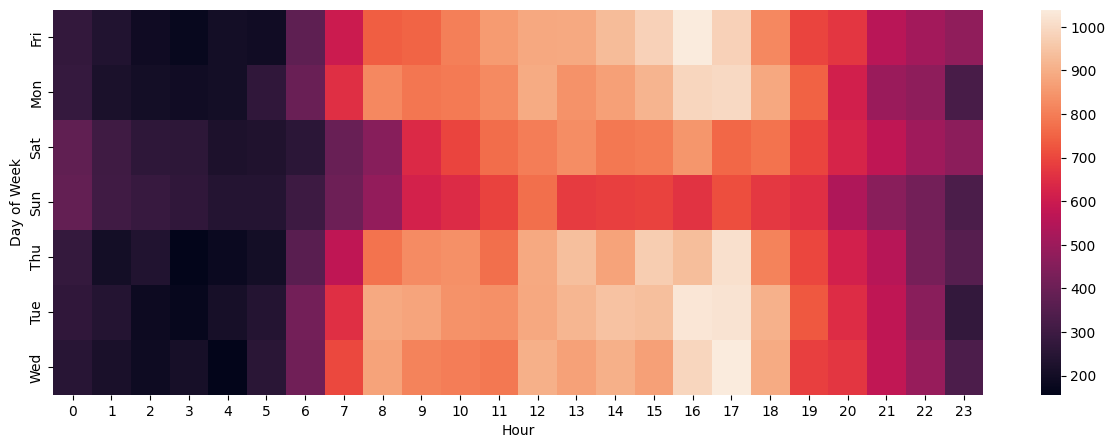

In [465]:
plt.figure(figsize=(15, 5))
sns.heatmap(dayHourdf)
plt.show

** Now create a clustermap using this DataFrame. **

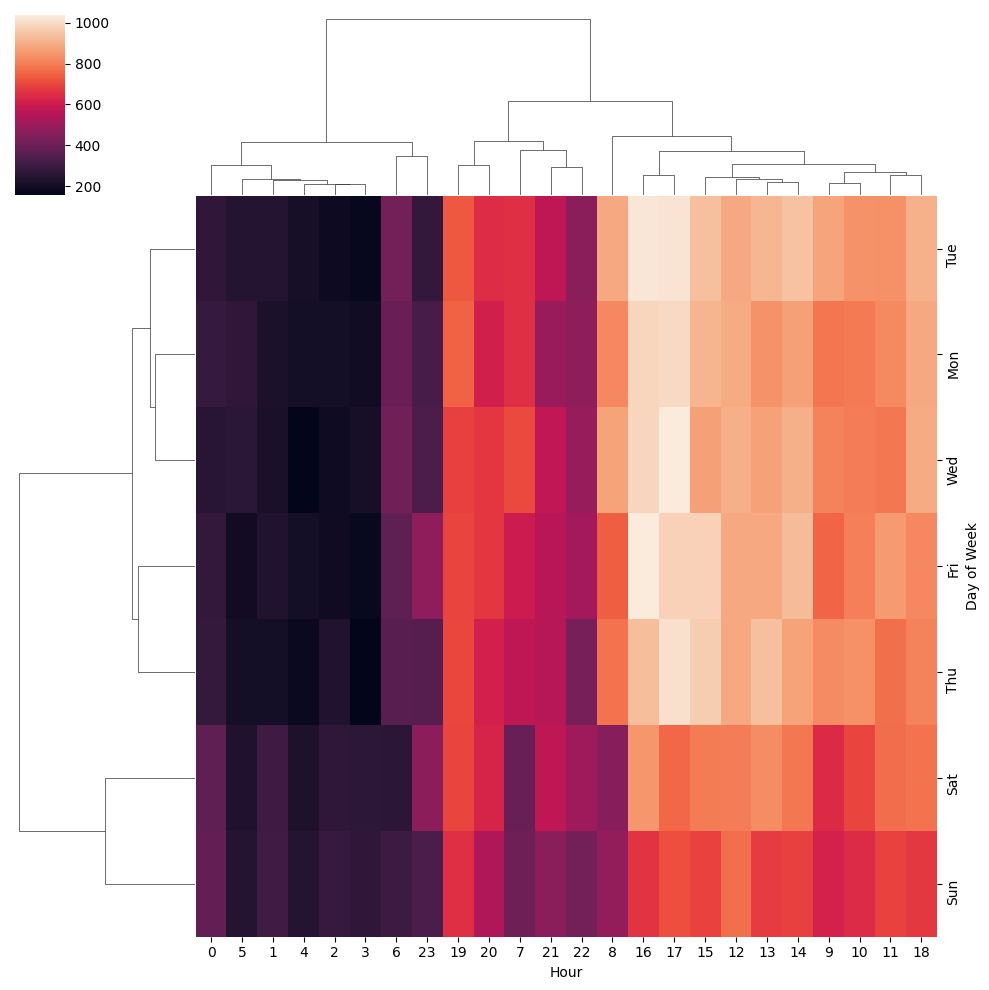

In [466]:
sns.clustermap(dayHourdf)
plt.show()

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

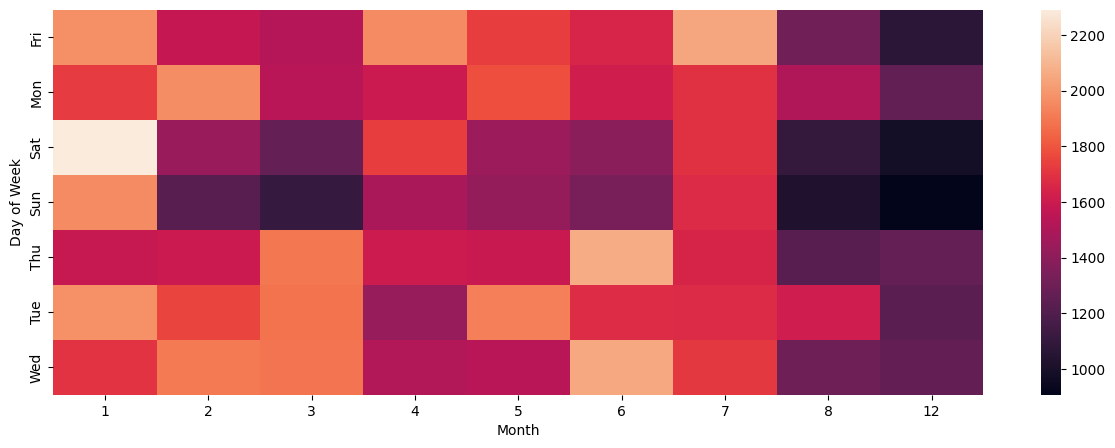

In [467]:
dayMonthdf = df.groupby(by=['Day of Week', 'Month']).count()['title'].unstack()
plt.figure(figsize=(15, 5))
sns.heatmap(dayMonthdf)
plt.show()

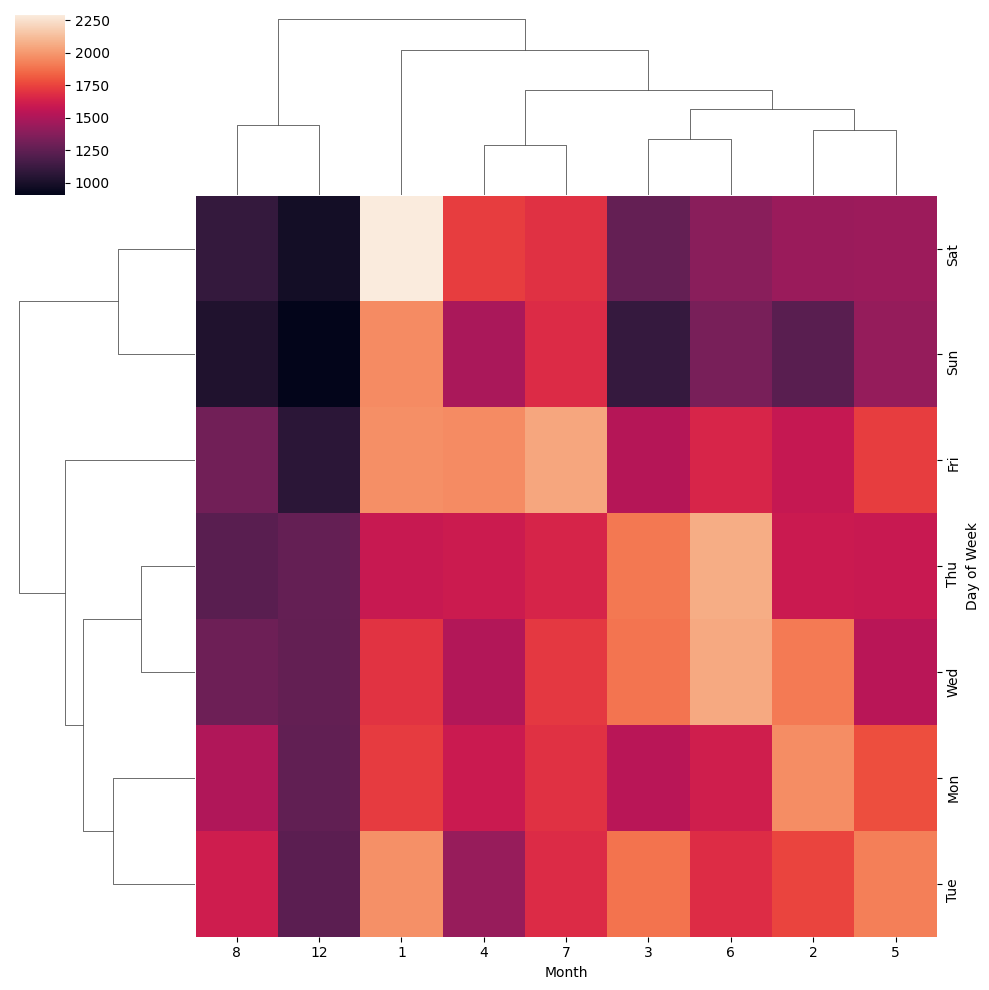

In [468]:
sns.clustermap(dayMonthdf)
plt.show()

## PART 2 

### This following part of this exercise can be done and delivered untill Sunday, 23/06/2024 up to 23:59 (11:59 PM).

#### Exercise: Analyzing Students.csv or whatever data base you may want to 
#### ( Data.gov, EU Open Data Portal, Kaggle Datasets )  work through - 

### Performance Data

***You are provided with a dataset containing information about student performance in exams. Your task is to perform data analysis and visualization using Python libraries. Here are the steps to follow:

#### 1) Load the Data:

##### 1.1) Use pandas to read the dataset from a CSV file (students.csv). Data Exploration:

In [469]:
df2 = pd.read_csv('students.csv')

##### 1.2) Display the first few rows of the dataset to understand its structure.

In [470]:
df2.head()

,id,first_name,last_name,date_of_birth,ethnicity,gender,status,entry_academic_period,exclusion_type,act_composite,...,sat_reading,hs_gpa,hs_city,hs_state,hs_zip,email,entry_age,ged,english_2nd_language,first_generation
0,111111.0,John,Doe,01/2000,Hispanic,M,FT,Fall 2008,NaN,NaN,...,NaN,2.71,Albuquerque,New Mexico,87112.0,jdoe@example.com,17.9,False,False,True
1,111112.0,Jane,Smith,05/2001,Hispanic,F,TRANSFER,Fall 2006,NaN,NaN,...,NaN,3.73,New York,New York,10009.0,jsmith@example.com,18.1,False,False,True
2,111113.0,Sarah,Thomas,21/2002,Hispanic,M,FTFT,Fall 2006,NaN,14.0,...,NaN,2.64,Pheonix,Arizona,85006.0,sthomas@example.com,17.6,False,False,False
3,111114.0,Frank,Brown,13/2002,Race/ethnicity unknown,M,FTFT,Fall 2006,NaN,NaN,...,210.0,3.68,Pheonix,Arizona,85015.0,fbrown@example.com,19.0,True,False,True
4,111115.0,Mike,Davis,31/2001,White,F,FTFT,Fall 2007,NaN,22.0,...,NaN,3.46,Seattle,Washington,98106.0,mdavis@example.com,18.2,False,True,False


##### 1.3) Check for missing values and handle them appropriately if necessary.

In [471]:
df2.isnull().sum()

id                       48
first_name               48
last_name                48
date_of_birth            48
ethnicity                48
gender                   48
status                   48
entry_academic_period    48
exclusion_type           57
act_composite            52
act_math                 52
act_english              51
act_reading              52
sat_combined             55
sat_math                 55
sat_verbal               55
sat_reading              55
hs_gpa                   49
hs_city                  48
hs_state                 48
hs_zip                   48
email                    48
entry_age                48
ged                      48
english_2nd_language     48
first_generation         48
dtype: int64

In [472]:
df2.fillna(0, inplace=True)
df2.isnull().sum()

id                       0
first_name               0
last_name                0
date_of_birth            0
ethnicity                0
gender                   0
status                   0
entry_academic_period    0
exclusion_type           0
act_composite            0
act_math                 0
act_english              0
act_reading              0
sat_combined             0
sat_math                 0
sat_verbal               0
sat_reading              0
hs_gpa                   0
hs_city                  0
hs_state                 0
hs_zip                   0
email                    0
entry_age                0
ged                      0
english_2nd_language     0
first_generation         0
dtype: int64

#### 2) Data Analysis:

##### 2.1) Calculate basic statistics of the dataset (mean, median, min, max, etc.).
##### Explore the distribution of scores using histograms and box plots.

In [473]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,57.0,17544.473684,40877.386637,0.0,0.0,0.0,0.0,111119.00
exclusion_type,57.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
act_composite,57.0,1.701754,5.678798,0.0,0.0,0.0,0.0,25.00
act_math,57.0,0.649123,2.302880,0.0,0.0,0.0,0.0,12.00
act_reading,57.0,0.526316,1.852655,0.0,0.0,0.0,0.0,10.00
sat_combined,57.0,38.070175,212.900367,0.0,0.0,0.0,0.0,1450.00
sat_math,57.0,11.052632,70.144855,0.0,0.0,0.0,0.0,520.00
sat_verbal,57.0,15.964912,85.102032,0.0,0.0,0.0,0.0,510.00
sat_reading,57.0,7.543860,39.923172,0.0,0.0,0.0,0.0,220.00
hs_gpa,57.0,0.460351,1.169461,0.0,0.0,0.0,0.0,4.24


#### 3) Data Visualization:

##### 3.1) Use matplotlib and seaborn to create visualizations such as:
##### a) Histograms of scores in different subjects.


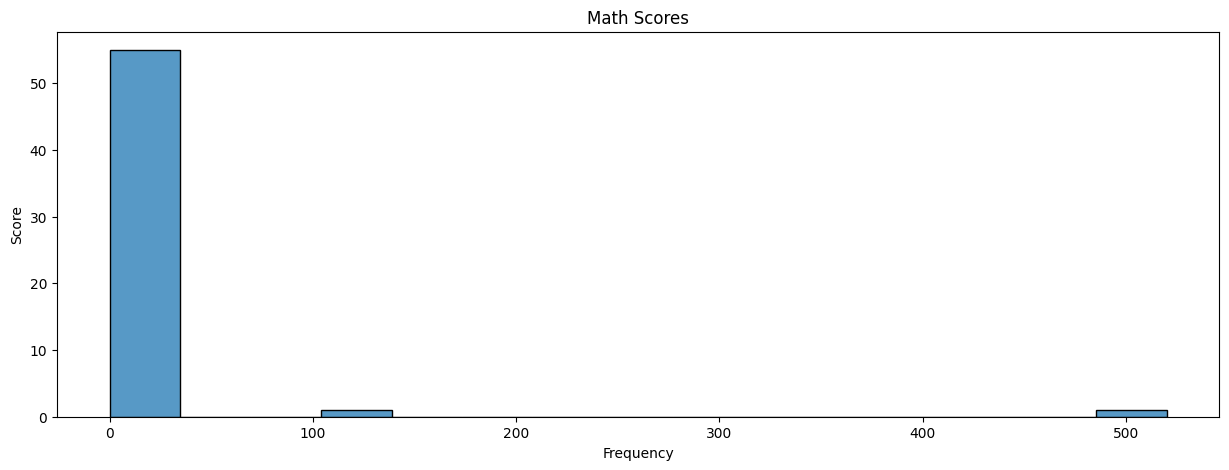

In [474]:
plt.figure(figsize=(15, 5))
sns.histplot(df2['sat_math'], bins=15)
plt.title('Math Scores')
plt.xlabel('Frequency')
plt.ylabel('Score')
plt.show()

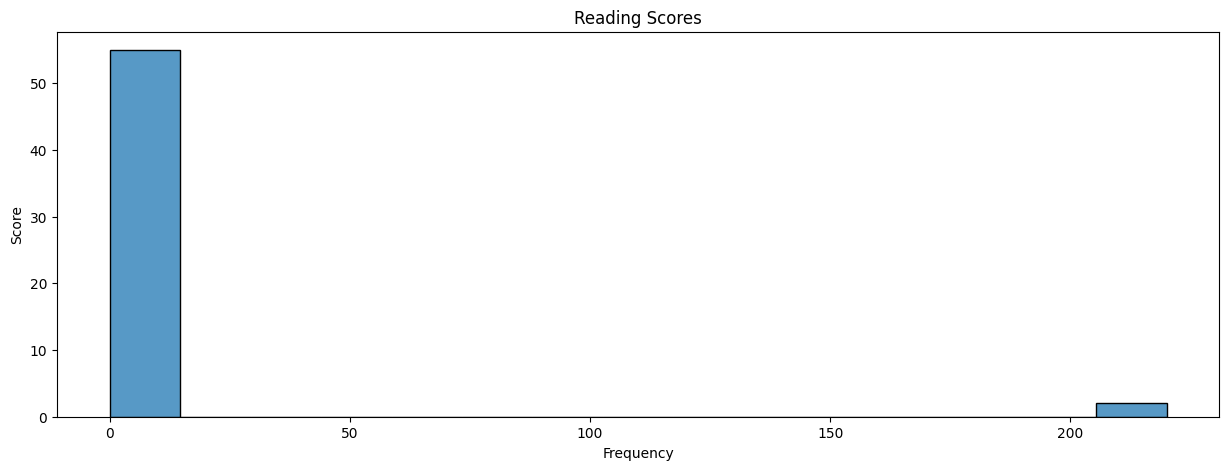

In [475]:
plt.figure(figsize=(15, 5))
sns.histplot(df2['sat_reading'], bins=15)
plt.title('Reading Scores')
plt.xlabel('Frequency')
plt.ylabel('Score')
plt.show()

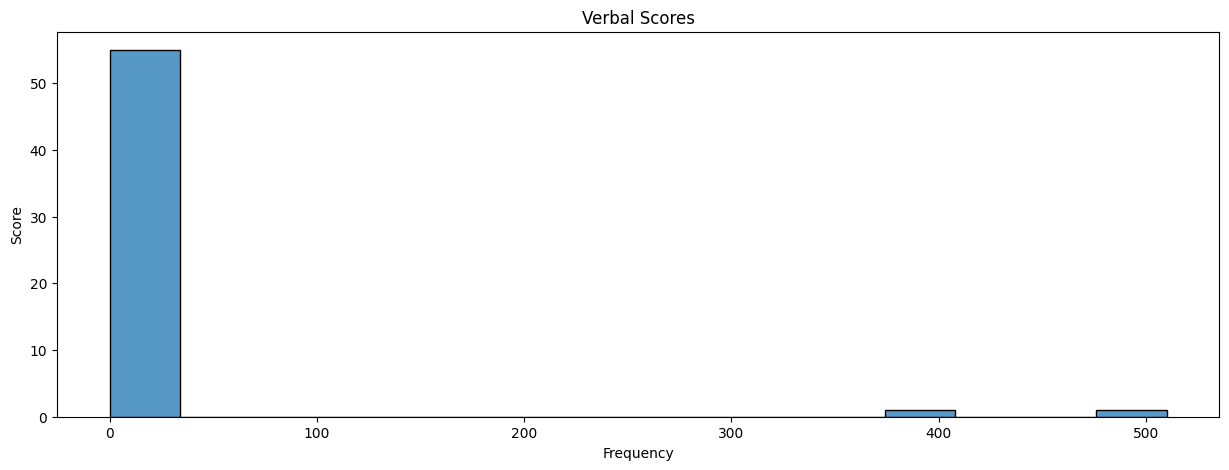

In [476]:
plt.figure(figsize=(15, 5))
sns.histplot(df2['sat_verbal'], bins=15)
plt.title('Verbal Scores')
plt.xlabel('Frequency')
plt.ylabel('Score')
plt.show()

##### b) Box plots to compare scores across different categories (e.g., gender, parental ##### level of education).

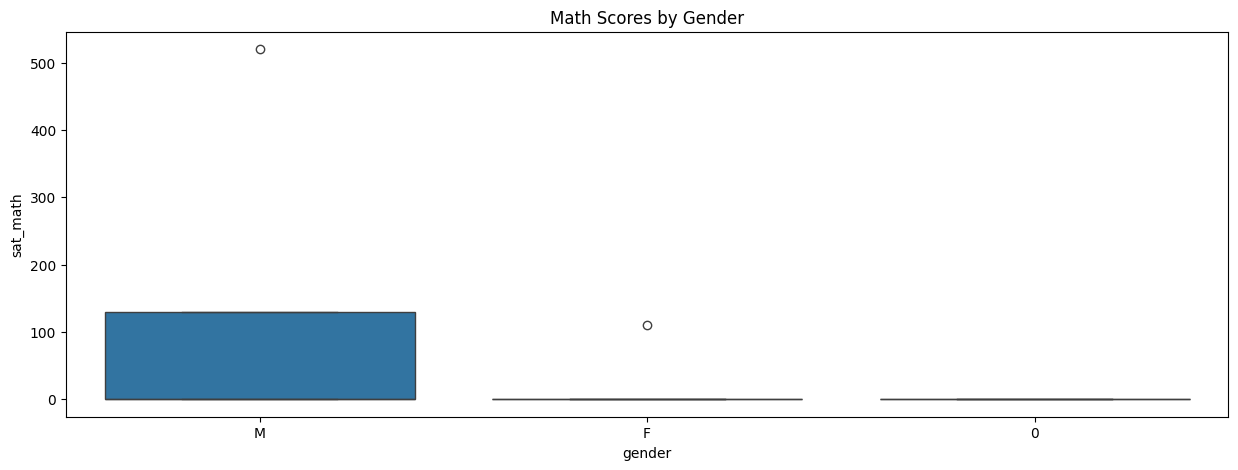

In [477]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='gender', y='sat_math', data=df2)
plt.title('Math Scores by Gender')
plt.show()

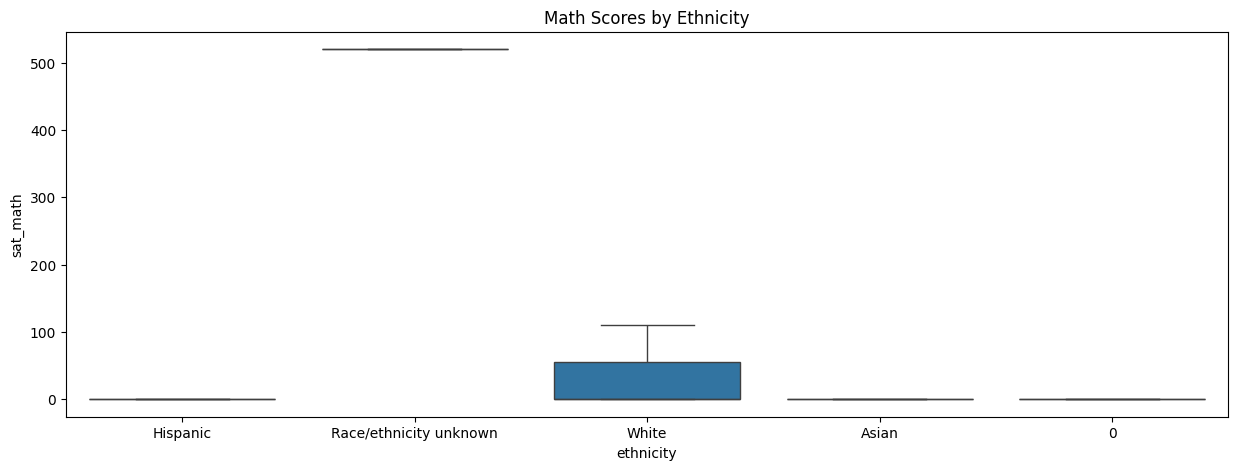

In [478]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='ethnicity', y='sat_math', data=df2)
plt.title('Math Scores by Ethnicity')
plt.show()

##### c) Scatter plots to explore relationships between variables (e.g., math vs. reading ##### scores).

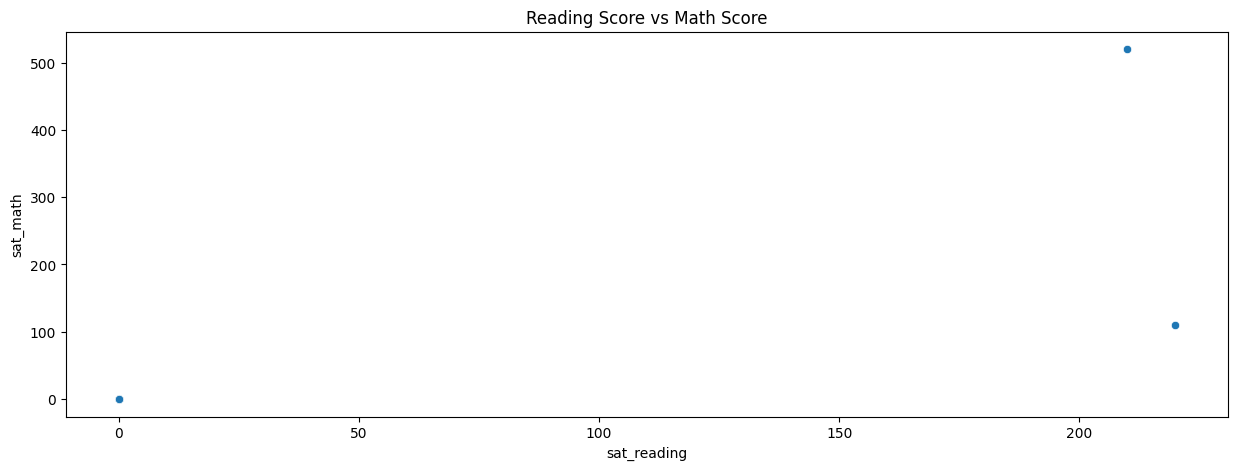

In [479]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='sat_reading', y='sat_math', data=df2)
plt.title('Reading Score vs Math Score')
plt.show()

#### 4) Advanced Analysis:

##### 4.1) Calculate correlations between different variables (e.g., scores in different 
##### subjects).

In [480]:
correlations = df2.corr(numeric_only=True)
correlations

,id,exclusion_type,act_composite,act_math,act_reading,sat_combined,sat_math,sat_verbal,sat_reading,hs_gpa,hs_zip,entry_age
id,1.000000,NaN,0.698217,0.656755,0.661916,0.416634,0.367123,0.437094,0.440269,0.917160,0.945578,0.999574
exclusion_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
act_composite,0.698217,NaN,1.000000,0.947688,0.972469,0.104973,0.025906,0.164480,0.202287,0.458092,0.747954,0.702798
act_math,0.656755,NaN,0.947688,1.000000,0.885341,0.079815,0.015593,0.128411,0.159439,0.442177,0.721322,0.656099
act_reading,0.661916,NaN,0.972469,0.885341,1.000000,0.111277,0.030013,0.172275,0.210934,0.374099,0.695310,0.670198
sat_combined,0.416634,NaN,0.104973,0.079815,0.111277,1.000000,0.967618,0.978548,0.938126,0.478371,0.439366,0.427510
sat_math,0.367123,NaN,0.025906,0.015593,0.030013,0.967618,1.000000,0.894857,0.820336,0.431014,0.391329,0.378569
sat_verbal,0.437094,NaN,0.164480,0.128411,0.172275,0.978548,0.894857,1.000000,0.989345,0.494119,0.457536,0.446984
sat_reading,0.440269,NaN,0.202287,0.159439,0.210934,0.938126,0.820336,0.989345,1.000000,0.492491,0.458565,0.449208
hs_gpa,0.917160,NaN,0.458092,0.442177,0.374099,0.478371,0.431014,0.494119,0.492491,1.000000,0.845391,0.914804


##### 4.2) Create a heatmap using seaborn to visualize correlations.

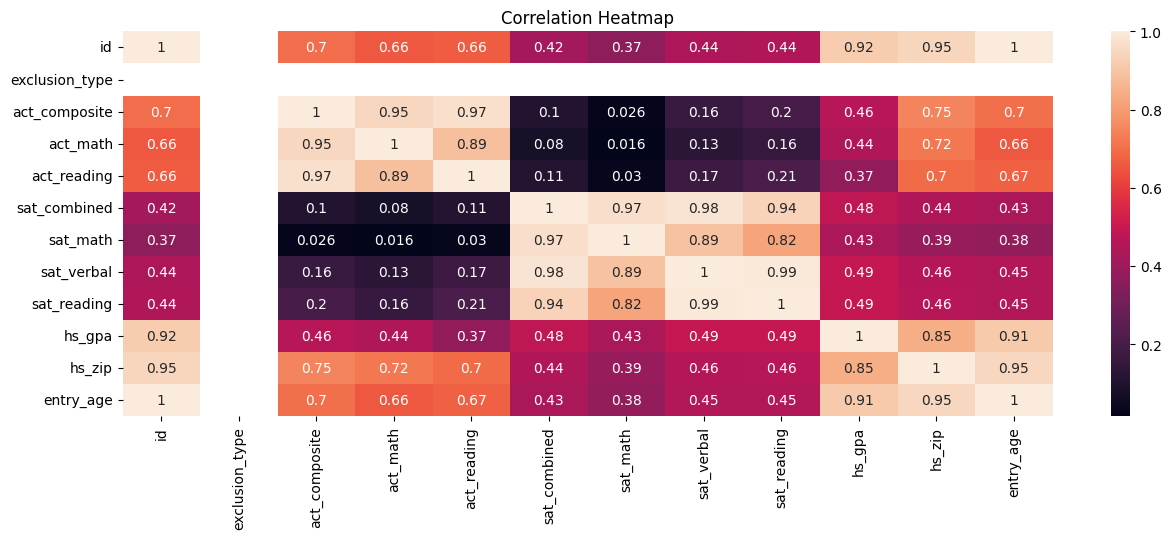

In [481]:
plt.figure(figsize=(15, 5))
sns.heatmap(correlations, annot=True)
plt.title('Correlation Heatmap')
plt.show()

## Conclusion:

### Summarize - State  your findings from the analysis.


Através das análises conseguimos perceber que as notas médias de matemática foram dicrepantes entre géneros e etinia, além de existir uma correlação entre as notas nas diferentes disciplinas. 
Portanto, os histogramas e os gráficos de caixa nos mostraram sobre a distribuição e dispersão das notas, e os gráficos de dispersão mostraram as relações entre diferentes notas.

### Provide insights or conclusions based on the visualizations and ### analyses performed.

Com as análises é possível pensar que, embora fatores como gênero e etinia mostrarem discrepancia, os gráficos não levaram em conta a quantidade de alunos que realizou o teste, podendo enviesar as conclusões a serem tomadas. A correlação entre as notas indicam que os alunos que apresentam bom desempenho em uma disciplina tendem a ter boas notas nas outras, e o inverso também. Essa análise pode ajudar os criadores dos testes a identificarem áreas que podem ser melhoradas para dar o suporte necessário para diferentes grupos de alunos.

## Send these two exercises to 

## fischer.stefan@academico.domhelder.edu.br

## Subeject: Project Capstone

## Save versions in .py or ipynb  and .pdf 

## Do not forget to write down your name!!

Felipe Gurgel Araujo